# Read JSON files

do premennej `graphsRaw` sa nacitaju vsetky grafy z datasetu

`graphRaw`:
  - `filename`: nazov .lua suboru z ktoreho je vytvoreny
  - `isTest`: 1 ak je to "testovaci" subor, inak 0
  - `isSpec`: 1 ak je to testovaci subor, inak 0
  - `nodes`: DataFrame(columns=\['id', 'type'\])
  - `edges`: DataFrame(columns=\['from', 'to'\])



In [1]:
import os
import pandas as pd
import json
from tqdm.notebook import tnrange # loading bar

graphsRaw = []

dataPath = '../data'
dirs = os.listdir(dataPath)
nDirs = len(dirs)

for i in tnrange(nDirs, desc='Dataset loading'):
    dirname = dirs[i]
    dirPath = dataPath + '/' + dirname
    for filename in os.listdir(dirPath):
        json_file = dirPath + '/' + filename
        with open(json_file) as jf:
            graph = {}
            try:
                jsonData = json.load(jf)
                graph['filename'] = jsonData['_filename']
                graph['path'] = jsonData['_path']
                graph['isTest'] = int(jsonData['_isTest'])
                graph['isSpec'] = int(jsonData['_isSpec'])
                graph['isShebang'] = int(jsonData['_isShebang'])
                graph['nodes'] = pd.DataFrame(jsonData['nodes'], columns=['id', 'type'])
                graph['nodes'] = graph['nodes'].set_index('id')
                graph['edges'] = pd.DataFrame(jsonData['edges'], columns=['from', 'to'])
                graphsRaw.append(graph)
            except:
                print(f'Wrong json file: {json_file}')

Dataset loading:   0%|          | 0/216 [00:00<?, ?it/s]

Wrong json file: ../data/cd/simpledraw.lua.json
Wrong json file: ../data/cd-examples/simpledraw.lua.json
Wrong json file: ../data/lrexlib/oniguruma_sets.lua.json
Wrong json file: ../data/lrexlib/pcre_sets.lua.json
Wrong json file: ../data/lrexlib-gnu/oniguruma_sets.lua.json
Wrong json file: ../data/lrexlib-gnu/pcre_sets.lua.json
Wrong json file: ../data/lrexlib-oniguruma/oniguruma_sets.lua.json
Wrong json file: ../data/lrexlib-oniguruma/pcre_sets.lua.json
Wrong json file: ../data/lrexlib-pcre/oniguruma_sets.lua.json
Wrong json file: ../data/lrexlib-pcre/pcre_sets.lua.json
Wrong json file: ../data/lrexlib-posix/oniguruma_sets.lua.json
Wrong json file: ../data/lrexlib-posix/pcre_sets.lua.json
Wrong json file: ../data/lrexlib-tre/oniguruma_sets.lua.json
Wrong json file: ../data/lrexlib-tre/pcre_sets.lua.json
Wrong json file: ../data/lua-openssl/7.csr.lua.json
Wrong json file: ../data/lua-path/test_wcs.lua.json
Wrong json file: ../data/lua-pop3/test-message.lua.json
Wrong json file: ../dat

In [654]:
#[gr['path'] for gr in graphsRaw if gr['isSpec'] == 1]
#[gr['path'] for gr in graphsRaw if gr['isTest'] == 1]
[gr['path'] for gr in graphsRaw if gr['isShebang'] == 1]

['modules/bencode/examples/dumptorrent.lua',
 'modules/bencode/tests/runtests.lua',
 'modules/busted/spec/lua.lua',
 'modules/cgilua/examples/app.lua',
 'modules/cgilua/tests/download.lua',
 'modules/cgilua/tests/prepara_sql2.lua',
 'modules/dado/tests/overall.lua',
 'modules/dado/tests/tdado.lua',
 'modules/dado/tests/tdbobj.lua',
 'modules/dado/tests/tsql.lua',
 'modules/dado/tests/ttable.extra.lua',
 'modules/etree/doc/html.lua',
 'modules/gzio/test/lartest.lua',
 'modules/gzio/test/tartest.lua',
 'modules/gzio/test/test.lua',
 'modules/kepler/web/app.lua',
 'modules/kepler/web/orbit/songs/songs.lua',
 'modules/loop/lua/precompiler.lua',
 'modules/loop/lua/preloader.lua',
 'modules/lpeg/test.lua',
 'modules/lpty/samples/expectex.lua',
 'modules/lpty/samples/lptytest.lua',
 'modules/lpty/samples/simpleex.lua',
 'modules/lpty/samples/testclient.lua',
 'modules/lua-apr/etc/buildbot.lua',
 'modules/lua-apr/benchmarks/file_io.lua',
 'modules/lua-cjson/tests/bench.lua',
 'modules/lua-cjso

# OneHot

kazdemu grafu z `graphsRaw` sa prida atribut `encNodeTypes` (OneHot kodovanie typov uzlov)
- `encNodeTypes` je DataFrame OneHot kodovani pre vsetky uzly v danom grafe
- **typy uzlov**: *\['require container', 'function', 'local variable', 'file', 'tableconstructor', 'module', 'statement:keyword', 'variable container', 'statement:numericfor', 'statement:genericfor', 'statement:if', 'global function', 'statement:functioncall', 'statement:assign', 'function container', 'statement:localassign', 'global variable', 'statement:globalfunction', 'statement:while', 'statement:localfunction', 'interface container', 'interface', 'require local variable', 'statement:do', 'statement:repeat'\]*
- ostatne typy uzlov sa ignoruju

In [292]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

ntypes = ['require container', 'function', 'local variable', 'file', 
          'tableconstructor', 'module', 'statement:keyword', 
          'variable container', 'statement:numericfor', 'statement:genericfor', 
          'statement:if', 'global function', 'statement:functioncall', 
          'statement:assign', 'function container', 'statement:localassign', 
          'global variable', 'statement:globalfunction', 'statement:while', 
          'statement:localfunction', 'interface container', 'interface', 
          'require local variable', 'statement:do', 'statement:repeat']

enc = OneHotEncoder(handle_unknown='ignore')
X = np.array(ntypes).reshape(-1,1)
enc.fit(X)

# encode all NodeTypes in graph
for gr in graphsRaw:
    encoded = enc.transform(gr['nodes']['type'].values.reshape(-1,1))
    gr['encNodeTypes'] = pd.DataFrame(encoded.toarray())

In [293]:
graphsRaw[0]['encNodeTypes']

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Create dataset

dataset tvoria `graphs` a `graph_labels`
- `graphs` je list of StellarGraphs
- `graph_labels` je list oznaceni pre dany graf na i-tej pozcii pre atribut `isTest`

In [880]:
from stellargraph import StellarGraph

def createStellarGraph(graphRaw):
    nodes = graphRaw['encNodeTypes']
    edges = graphRaw['edges']
    graph = StellarGraph(nodes=nodes, edges=edges, source_column='from', target_column='to', is_directed=True)
    return graph


graphs = [createStellarGraph(gr) for gr in graphsRaw]
#graph_labels = pd.Series([1 if gr['isShebang'] else 2 if gr['isSpec'] else 3 if gr['isTest'] else 0 for gr in graphsRaw], dtype="category", name='label')
graph_labels = pd.Series([1 if gr['isShebang'] else 2 if gr['isSpec'] else 0 for gr in graphsRaw], dtype="category", name='label')
#graph_labels = pd.Series([1 if gr['isSpec'] else 0 for gr in graphsRaw], dtype="category", name='label')
#graph_labels = pd.Series([1 if gr['isShebang'] else 0 for gr in graphsRaw], dtype="category", name='label')

# Dataset stats

In [881]:
graph_labels.value_counts()

0    2249
1     131
2     112
Name: label, dtype: int64

In [845]:
summary = pd.DataFrame(
    [(g.number_of_nodes(), g.number_of_edges()) for g in graphs],
    columns=["nodes", "edges"],
)
summary.describe().round(1)

,nodes,edges
count,2492.0,2492.0
mean,93.9,156.9
std,165.7,308.6
min,5.0,4.0
25%,20.0,24.0
50%,43.0,57.0
75%,100.0,153.0
max,2400.0,4300.0


# Outliers TODO

In [805]:
lower = summary['nodes'].quantile(0.05)
upper = summary['nodes'].quantile(0.95)

In [806]:
clipped = summary.loc[(summary['nodes'] > lower) & (summary['nodes'] < upper)]

In [807]:
clipped.describe().round(1)

,nodes,edges
count,2239.0,2239.0
mean,68.2,109.6
std,65.9,138.7
min,9.0,8.0
25%,22.5,27.0
50%,43.0,57.0
75%,90.0,136.5
max,340.0,1960.0


In [808]:
graph_labels = graph_labels.iloc[clipped.index]

# Undersampling
z datasetu sa vyberie len nejaky pocet grafov tak aby sa pocty grafov vytvorenych z testovacich a grafov vytvorenych z netestovacich suborov rovnal 

In [846]:
from imblearn.under_sampling import RandomUnderSampler

u_samp_strategy = {
    0: 500,
    1: 131,
    2: 112
}

undersample = RandomUnderSampler(sampling_strategy=u_samp_strategy, random_state=40)
X_under, y_under = undersample.fit_resample(np.array(graphs).reshape(-1, 1), graph_labels.to_numpy())

In [847]:
graphs = X_under.flatten()
graph_labels = y_under

# Oversampling

In [849]:
from imblearn.over_sampling import RandomOverSampler

o_samp_strategy = {
    0: 500,
    1: 260,
    2: 240
}

oversample = RandomOverSampler(sampling_strategy=o_samp_strategy, random_state=10)
X_over, y_over = oversample.fit_resample(graphs.reshape(-1, 1), graph_labels)

In [850]:
graphs = X_over.flatten()
graph_labels = y_over

# Sampled dataset stats

In [852]:
print(graphs[0].info())

StellarGraph: Directed multigraph
 Nodes: 51, Edges: 72

 Node types:
  default: [51]
    Features: float32 vector, length 25
    Edge types: default-default->default

 Edge types:
    default-default->default: [72]
        Weights: all 1 (default)
        Features: none


In [853]:
print(graphs[1].info())

StellarGraph: Directed multigraph
 Nodes: 47, Edges: 58

 Node types:
  default: [47]
    Features: float32 vector, length 25
    Edge types: default-default->default

 Edge types:
    default-default->default: [58]
        Weights: all 1 (default)
        Features: none


In [854]:
pd.Series(graph_labels).value_counts().to_frame()

,0
0,500
1,260
2,240


In [855]:
summary = pd.DataFrame(
    [(g.number_of_nodes(), g.number_of_edges()) for g in graphs],
    columns=["nodes", "edges"],
)
summary.describe().round(1)

,nodes,edges
count,1000.0,1000.0
mean,93.3,197.2
std,146.1,356.5
min,5.0,4.0
25%,20.0,25.0
50%,40.0,58.0
75%,104.0,187.2
max,1642.0,2697.0


# Prepair generator

In [882]:
graph_labels = pd.get_dummies(graph_labels, drop_first=False)

In [883]:
num_graphs, num_classes = graph_labels.shape
print(f'Number of classes: {num_classes}\nNumber of graphs: {num_graphs}')

Number of classes: 3
Number of graphs: 2492


In [884]:
from stellargraph.mapper import PaddedGraphGenerator
generator = PaddedGraphGenerator(graphs=graphs)

# Supervised graph classification with GCN [StellarGraph]

In [859]:
from stellargraph.layer import GCNSupervisedGraphClassification

from sklearn import model_selection

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt

In [860]:
def create_graph_classification_model(generator):
    gc_model = GCNSupervisedGraphClassification(
        layer_sizes=[64, 64],
        activations=["relu", "relu"],
        generator=generator,
        dropout=0.5,
    )
    x_inp, x_out = gc_model.in_out_tensors()
    predictions = Dense(units=32, activation="relu")(x_out)
    predictions = Dense(units=16, activation="relu")(predictions)
    predictions = Dense(num_classes, activation="softmax")(predictions)

    model = Model(inputs=x_inp, outputs=predictions)
    model.compile(optimizer=Adam(0.005), loss=categorical_crossentropy, metrics=["acc"])

    return model

In [861]:
es = EarlyStopping(
    monitor="val_loss", min_delta=0, patience=25, restore_best_weights=True
)

In [862]:
def get_generators(train_index, test_index, graph_labels, batch_size):
    train_gen = generator.flow(
        train_index, targets=graph_labels.iloc[train_index].values, batch_size=batch_size
    )
    test_gen = generator.flow(
        test_index, targets=graph_labels.iloc[test_index].values, batch_size=batch_size
    )

    return train_gen, test_gen

In [863]:
#train_graphs, test_graphs = model_selection.train_test_split(
#    graph_labels, train_size=0.9, test_size=None, stratify=graph_labels,
#)

In [864]:
# TRAIN VAL TEST
train_graphs, test_graphs = model_selection.train_test_split(
    graph_labels, train_size=0.85, test_size=None, stratify=graph_labels
)

train_graphs, val_graphs = model_selection.train_test_split(
    train_graphs, train_size=0.82, test_size=None
)

In [865]:
train_gen, val_gen = get_generators(
        train_graphs.index, val_graphs.index, graph_labels, batch_size=30
    )

In [866]:
model = create_graph_classification_model(generator)

In [867]:
epochs = 100

In [868]:
history = model.fit(
        train_gen, epochs=epochs, validation_data=val_gen, verbose=1, callbacks=[es],
    )

test_metrics = model.evaluate(val_gen, verbose=0)
val_acc = test_metrics[model.metrics_names.index("acc")]

Epoch 1/100
24/24 [==============================] - 7s 259ms/step - loss: 1.0347 - acc: 0.4588 - val_loss: 0.8260 - val_acc: 0.6667
Epoch 2/100
24/24 [==============================] - 6s 269ms/step - loss: 0.7964 - acc: 0.6643 - val_loss: 0.6130 - val_acc: 0.6928
Epoch 3/100
24/24 [==============================] - 8s 362ms/step - loss: 0.6697 - acc: 0.6967 - val_loss: 0.5134 - val_acc: 0.8562
Epoch 4/100
24/24 [==============================] - 7s 282ms/step - loss: 0.6487 - acc: 0.7228 - val_loss: 0.4634 - val_acc: 0.8366
Epoch 5/100
24/24 [==============================] - 6s 260ms/step - loss: 0.6481 - acc: 0.7194 - val_loss: 0.5109 - val_acc: 0.8497
Epoch 6/100
24/24 [==============================] - 6s 246ms/step - loss: 0.6098 - acc: 0.7236 - val_loss: 0.4613 - val_acc: 0.8301
Epoch 7/100
24/24 [==============================] - 6s 246ms/step - loss: 0.6099 - acc: 0.7430 - val_loss: 0.4445 - val_acc: 0.8366
Epoch 8/100
24/24 [==============================] - 6s 251ms/step - 

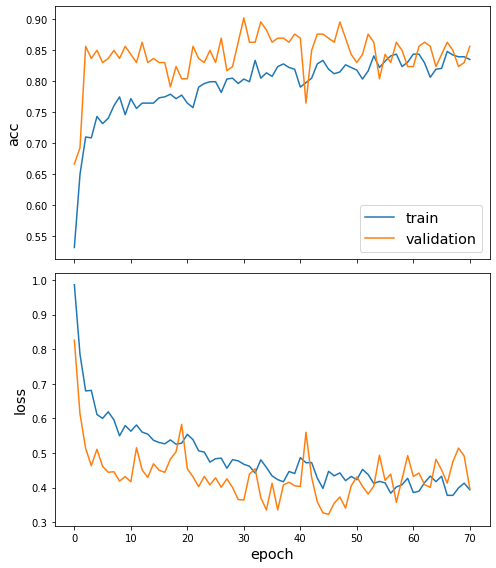

In [871]:
import stellargraph as sg
sg.utils.plot_history(history)

In [872]:
print(val_acc)

0.8692810535430908


# Evaluate on test sample

In [893]:
#test_gen = generator.flow(
#        test_graphs.index, targets=graph_labels.iloc[test_graphs.index].values, batch_size=1
#    )

test_gen = generator.flow(
        np.arange(len(graphs)), targets=graph_labels.iloc[np.arange(len(graphs))].values, batch_size=1
    )

In [894]:
test_metrics = model.evaluate(test_gen)
print("\nTest Set Metrics:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

2492/2492 [==============================] - 5s 2ms/step - loss: 0.2629 - acc: 0.8965

Test Set Metrics:
	loss: 0.2629
	acc: 0.8965


In [899]:
predicts = model.predict(test_gen)

In [900]:
Y_pred = predicts.argmax(axis=1)

In [901]:
Y = graph_labels.iloc[test_graphs.index].values.argmax(axis=1)

In [902]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y, Y_pred)

<AxesSubplot:>

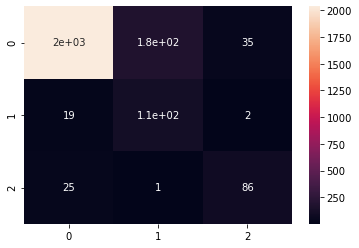

In [903]:
import seaborn as sns
sns.heatmap(matrix, annot=True)

# Save model to local storage

In [759]:
model.save('model_3classes_undersample')

INFO:tensorflow:Assets written to: model_3classes_undersample/assets


# Hidden

In [3]:
uniquelist = []
for d in graphsRaw:
    curr_list = d['nodes']['type'].unique()
    uniquelist += list(set(curr_list) - set(uniquelist))

In [4]:
print(len(uniquelist))
print(uniquelist)

36
['function container', 'statement:if', 'local variable', 'blank lines', 'variable container', 'statement:genericfor', 'statement:keyword', 'statement:localassign', 'module', 'statement:assign', 'interface', 'file', 'interface container', 'require container', 'global variable', 'statement:while', 'n/a', 'statement:functioncall', 'global function', 'tableconstructor', 'function', 'table assign node', 'require local variable', 'string', 'statement:numericfor', 'number', 'statement:localfunction', '_simpleexp', 'statement:globalfunction', 'keyword', 'symbol', 'statement:repeat', 'unop', 'boolean', '_prefixexp', 'statement:do']


# Visualize graphs

In [ ]:
from graphviz import Digraph

for _, d in enumerate(data):
  nodes_data = data[623]['nodes']
  edges_data = data[623]['edges']

  dot = Digraph(format='png')
  for index, row in nodes_data.iterrows():
    dot.node(str(row.id), str(row['type']), shape='box') # + '\n' + str(row.text)
  for index, row in edges_data.iterrows():
    dot.edge(str(row['from']), str(row['to'])) #, label=row['label']
  dot.render('graphVisualizations/' + data[623]['filename'])
  # TODO
  if _ >= 0:
    break 